In [80]:
import pandas as pd
import numpy as np
import librosa as lr
import pydub
import math

In [3]:
lr.__version__

'0.10.0.post2'

In [25]:
dur = pydub.utils.mediainfo('/Users/stevenstrange/Desktop/Genres/songs/Y.Music/classical/2.wav')['duration']

data, sr = lr.load('/Users/stevenstrange/Desktop/Genres/songs/Y.Music/classical/2.wav',  duration = math.floor(float(dur)))

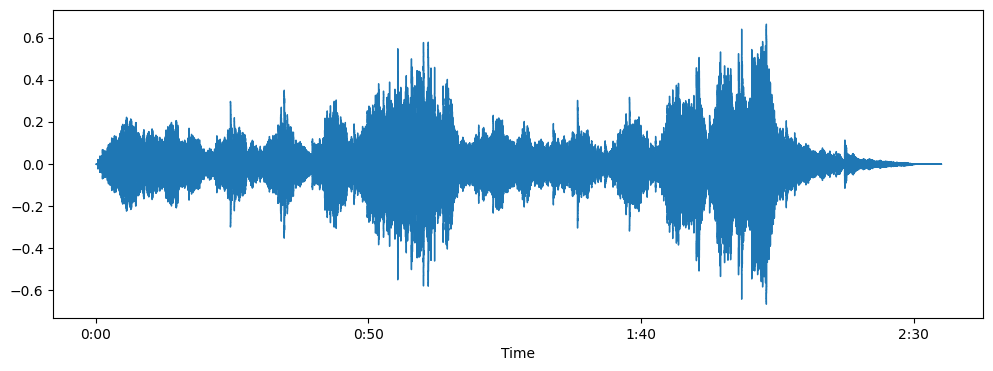

In [29]:
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(12, 4))
librosa.display.waveshow(data, sr=sr)
plt.show()

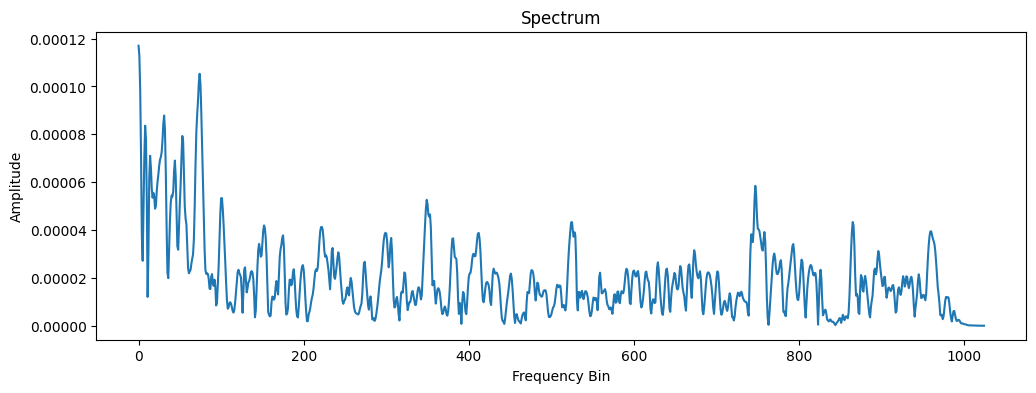

In [73]:
n_fft = 2048
plt.figure(figsize=(12, 4))
ft = np.abs(librosa.stft(data[:n_fft], hop_length = n_fft+1))
plt.plot(ft);
plt.title('Spectrum');
plt.xlabel('Frequency Bin');
plt.ylabel('Amplitude');

### librosa.feature - смотрим, что может

***Функция***: *librosa.feature.chroma_cens, librosa.feature.chroma_cqt*\
***Вычисляет вариант цветности ”Нормализованная энергия цветности" (CENS)***\
Для вычисления признаков CENS после получения векторов цветности с помощью chroma_c qt выполняются следующие шаги:
1. L-1 нормализация каждого вектора цветности
2. Квантование амплитуды на основе “логарифмических” пороговых значений амплитуды
3. (необязательно), сглаживание со скользящим окном. Длина окна по умолчанию = 41 кадр
4. (не реализовано) Понижающая дискретизация

Функции CENS устойчивы к динамике, тембру и артикуляции, поэтому они обычно используются в приложениях для подбора и извлечения звука.

In [78]:
chroma_cens = ls.feature.chroma_cens(y=data, sr=sr)
chroma_cq = ls.feature.chroma_cqt(y=data, sr=sr)

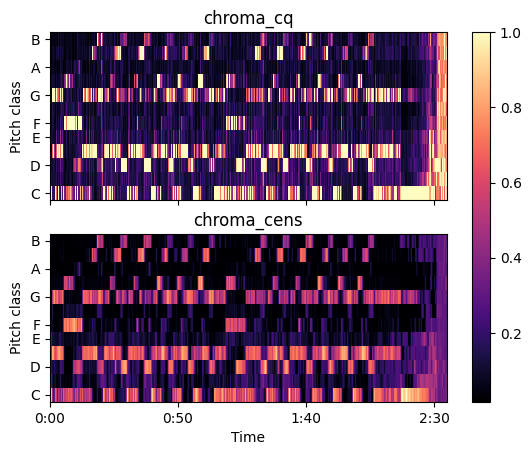

In [82]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
img = lr.display.specshow(chroma_cq, y_axis='chroma', x_axis='time', ax=ax[0])
ax[0].set(title='chroma_cq')
ax[0].label_outer()
lr.display.specshow(chroma_cens, y_axis='chroma', x_axis='time', ax=ax[1])
ax[1].set(title='chroma_cens')
fig.colorbar(img, ax=ax)

***Функция***: *librosa.feature.chroma_stft*\
***Вычисление хромаграммыпо форме волны или спектрограмме мощности.***\
This implementation is derived from chromagram_E\
Вычисление хромаграммы по форме волны или спектрограмме мощности.\

In [84]:
S = np.abs(librosa.stft(data, n_fft=4096))**2
chroma = librosa.feature.chroma_stft(S=S, sr=sr)

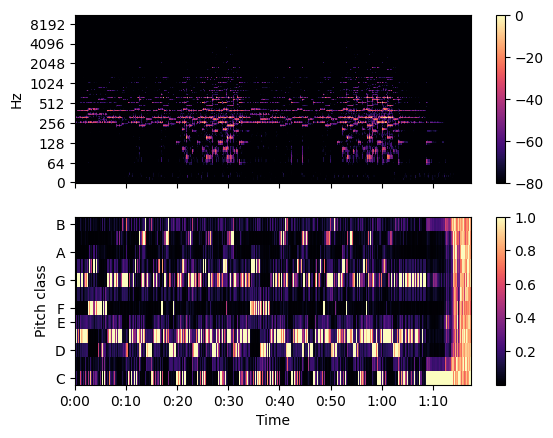

In [85]:
fig, ax = plt.subplots(nrows=2, sharex=True)
img = librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                                y_axis='log', x_axis='time', ax=ax[0])
fig.colorbar(img, ax=[ax[0]])
ax[0].label_outer()
img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax[1])
fig.colorbar(img, ax=[ax[1]])

***Функция***: *librosa.feature.chroma_vqt*\
***Вычисление хромаграммыпо форме волны или спектрограмме мощности.***\
Сравнение a long-window STFT хромограммы с CQT хромограммой

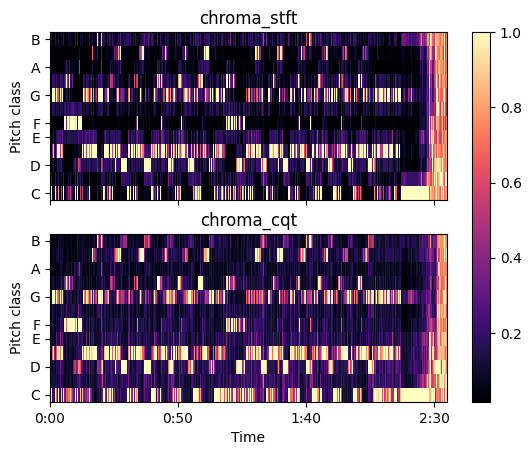

In [91]:
import matplotlib.pyplot as plt
chroma_cq = librosa.feature.chroma_cqt(y=data, sr=sr)
chroma_stft = librosa.feature.chroma_stft(y=data, sr=sr,
                                           n_chroma=12, n_fft=4096)
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
librosa.display.specshow(chroma_stft, y_axis='chroma', x_axis='time', ax=ax[0])
ax[0].set(title='chroma_stft')
ax[0].label_outer()
img = librosa.display.specshow(chroma_cq, y_axis='chroma', x_axis='time', ax=ax[1])
ax[1].set(title='chroma_cqt')
fig.colorbar(img, ax=ax)

***Функция***: *librosa.feature.fourier_tempogram*\
***Compute the Fourier tempogram: the short-time Fourier transform of the onset strength envelope***\

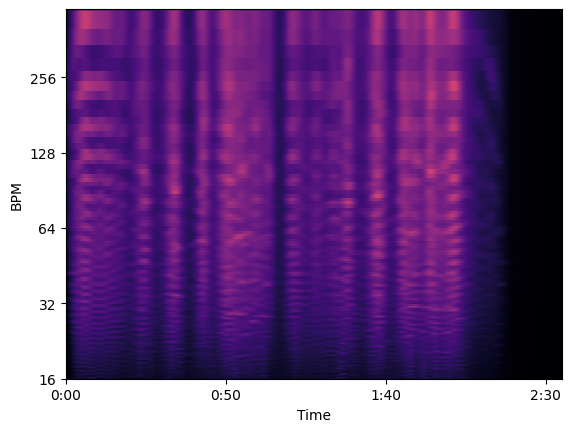

In [102]:
oenv = librosa.onset.onset_strength(y=data, sr=sr, hop_length=512)
ac_tempogram = librosa.feature.tempogram(onset_envelope=oenv, sr=sr,
                                          hop_length=512, norm=None)
librosa.display.specshow(ac_tempogram, sr=sr, hop_length=512,
                          x_axis='time', y_axis='tempo', cmap='magma')

***Функция***: *librosa.feature.mfcc*

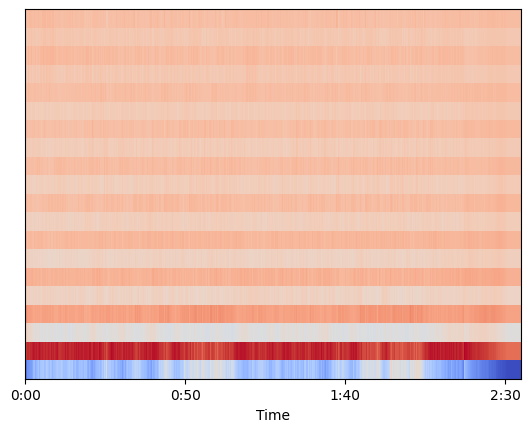

In [105]:
m_htk = librosa.feature.mfcc(y=data, sr=sr, dct_type=3)
librosa.display.specshow(m_htk, x_axis='time')

***Функция***: *librosa.feature.rms*\
***Compute root-mean-square (RMS) value for each frame, either from the audio samples y or from a spectrogram S.***

Computing the RMS value from audio samples is faster as it doesn’t require a STFT calculation. However, using a spectrogram will give a more accurate representation of energy over time because its frames can be windowed, thus prefer using S if it’s already available.

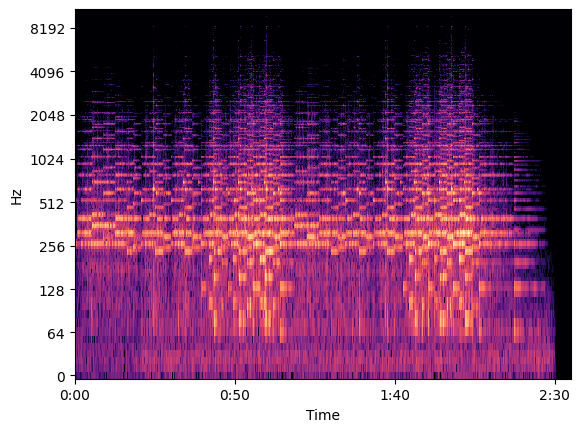

In [109]:
S, phase = librosa.magphase(librosa.stft(data))
rms = librosa.feature.rms(S=S)
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                          y_axis='log', x_axis='time')

In [130]:
data.shape, ft.shape, chroma_cens.shape,chroma_cq.shape,chroma.shape,chroma_stft.shape,ac_tempogram.shape,m_htk.shape,rms.shape

((3417750,),
 (1025, 1),
 (12, 6676),
 (12, 6676),
 (12, 3338),
 (12, 6676),
 (384, 6676),
 (20, 6676),
 (1, 6676))

In [118]:
data

array([ 1.6484591e-12, -2.0463631e-12,  1.1937118e-12, ...,
       -1.7260520e-06, -5.2273203e-06,  3.1811906e-06], dtype=float32)

#### Итак, что имеем?
У нас есть куча вариантов, как обработать аудиофайл. Из них надо выбрать наиболее релевантные и непохожие друг на друга. Также имеем временной ряд *data*, который, возможно, можно как-нибудь обработать, посмотрим в дальнейшем. Во время обработки и скачивания данных со спотифай нашли интересную вещь - фичи песен от самого спотифая. Возможно, это как-то поможет

In [127]:
my_array = np.array([[11,22,33],[44,55,66]])
my_array2 = np.array([[11,22,33],[44,55,66]])


df = pd.DataFrame(data)
